# Projet Câble sous-marin

# Partie théorique

$\textbf{Question 1}$ :<br><br>
La loi forte des grands nombres nous autorise à estimer l'espérance conditionelle par la moyenne empirique de simulations conditionnelles. En effet la suite des variables aléatoires $\frac{1}{K} \sum\limits_{k=0}^K L_{k}$ converge presque sûrement vers la $\mathbb{E}(L) $ (avec les $L_k$ des variables aléatoires indépendantes, de même loi que $L$, que l'on suppose intégrable ou de carré intégrable). En simulant la valeur de $\frac{1}{K} \sum\limits_{k=0}^K L_{k}$, soit en calculant $\frac{1}{K} \sum\limits_{k=0}^K l_{k}$ avec les $l_k$ le résultat de la k-ième simulation de $L$, on obtiendra une valeur proche de $\mathbb{E}(L) $.<br><br>   On peut effectuer la même procedure avec des variable aléatoires $L'_k$ indépendante mais de loi $L|Z=z$ avec z un vecteur donné. 

$\textbf{Question 2}$ :<br><br>
On note $Y$ le vecteur aléatoire formé des composantes de $Z$ correspondant
aux points de discrétisation sans observation.<br><br>
Z est un vecteur aléatoire gaussien de matrice de covariance notée C calculée à partir de la distance entre les points et d'une fonction décroissante qui, appliquée auc coeffiscients d'une matrice de distance, donne une matrice définie positive (notée C aussi dans le polycopié).
<br><br>
    D'après le cours, si l'on note $C_y$ la matrice de covariance extraite de la matrice C pour les points fixés de Z (c'est donc la matrice qui contient uniquement les lignes et les colonnes dont l'indice correspond au numero d'un point de Z (en comptant à partir de zero) qui est fixé), alors $Y|Z=z$ est un vecteur gaussien qui admet pour densité la fonction: \begin{equation} f_{Y|Z=z}:y \rightarrow \frac{1}{(2\pi)^\frac{n-n_f}{2} \sqrt{\det{C S_Y}}}\exp(-\frac{1}{2} (y-\psi(z)^\top [C S_Y] ^{-1} (y-\psi(z))) \end{equation}
 <br><br>
 avec $n$ le nombre de points considérés dans $Z$, et $n_f$ le nombre de points fixés, $\psi(z) = m_Y + C_{Y,Z} C_{z}^{−1} (z − m_Z)$ ou $m_Y$ est le vecteur contenant les espérences des composantes de Y lorsqu'il n'y a pas de conditions et $C S_Y$  tel que  $C S_Y=C_Y − C_{Y,Z} C_Z^{−1}C_{Z,Y}$
 


$\textbf{Question 3}$ :<br><br>
$Y = (Y_1, . . . , Y_p)$ est un vecteur de composantes gaussiennes indépendantes, d’espérance nulle et de variance 1.

<br>
Nous allons utiliser le théorème qui stipule qu'un vecteur aléatoire est gaussien si et seulements si toute combinaison linéaire de ses composantes est une variable aléatoire gausienne.<br>
Prenons une composante de $RY$. Cette varaible aéatoire s'écrit comme une combinaison linéaire de composante de Y (car on a $[RY]_i=\sum\limits_{i=0}^p R_{ij}Y_j$  ).
<br>
Si on forme maintenant une combinaison linéaire quelconque de composante de $RY$, cette quantité va elle même pouvoir d'écrire comme un combinaison linéaire des composantes de $Y$. Le théorème nous dit donc que cette quantité est une variable aléatoire reelle gausienne.

Ainsi, toute combinaison des composantes de $RY$ est une variable aléatoire gaussienne. Le théorème nous dis alors que RY est un vecteur gaussien, et donc que $Z=m + RY$ est un vecteur gaussien, car m est constant.
<br> <br> 
On note C la matrice de covariance de Z.

<br>
Par linéarite de l'espérance, on a en calculant composante par composante:  $\mathbb{E}(Z)=m$ et par indépendances des $Y_i$, pour $0\leq i \leq p-1$ et $0\leq j \leq p-1$: <br>  $C_{ij}=cov(Z_i,Z_j)=cov(m_i + \sum\limits_{k=0}^p R_{ik}Y_k,m_j + \sum\limits_{k=0}^p R_{jk}Y_k = \sum\limits_{k=0}^p R_{ik}R_{jk}\mathbb{V}(Y_k)=\sum\limits_{k=0}^p R_{ik}R_{jk}={[R R^\top}]_{ij}$ 
<br>
Donc $C=R R^\top$
<br>
On connaît ainsi entièrement la loi de $Z$.


$\textbf{Question 4}$ :<br><br>
On connait déja les valeurs de Z pour les points ou il y a obsrvation. Il faut maintenant simuler le vecteur $Y$ de la question 2. Ce vecteur aléatoire est gaussien, et on connaite sa matrice de covariance $C_y=C S_y$ ainsi que son espérance  $\psi(z) = m_Y + C_{Y,Z} C_{z}^{−1} (z − m_Z)$

# Partie code

Voici la première partie du code donnée.

In [2]:
#Chargement de dépendances
import numpy as np
import matplotlib.pyplot as plt

#Discrétisation
A=0
B=500

N=101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta

#Paramètres du modèle
mu=-5
a = 50
sigma2 = 12

#Données
observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observées
unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))
  

    

Q1: On défini C qui retourne la covariance entre deux points (en prenant en argument la distance entre deux points

In [3]:
def C(M,a,sigma2):
    
    return sigma2*np.exp(-M/a)

Q2 : On défini mat_distance qui retourne la matrice de distance 

In [4]:
def matrice_distance(x):
    A=np.array([x]*len(x)).T
    B=np.array([x]*len(x))
    return np.abs(A-B)

Q3 : Le calcul de la matrice de covariance est réalisé par le code suivant:

In [5]:
matrice_covZ=C(matrice_distance(discretization_indexes),a,sigma2)
matrice_covZ

array([[12.        , 11.76238408, 11.52947327, ...,  1.69030105,
         1.65683085,  1.6240234 ],
       [11.76238408, 12.        , 11.76238408, ...,  1.7244474 ,
         1.69030105,  1.65683085],
       [11.52947327, 11.76238408, 12.        , ...,  1.75928355,
         1.7244474 ,  1.69030105],
       ...,
       [ 1.69030105,  1.7244474 ,  1.75928355, ..., 12.        ,
        11.76238408, 11.52947327],
       [ 1.65683085,  1.69030105,  1.7244474 , ..., 11.76238408,
        12.        , 11.76238408],
       [ 1.6240234 ,  1.65683085,  1.69030105, ..., 11.52947327,
        11.76238408, 12.        ]])

In [49]:
cov_z= matrice_covZ[0:101:20, 0:101:20]
cov_yz = np.transpose(np.delete(matrice_covZ, observation_indexes, axis=1)[0:101:20])
cov_y = np.delete(np.delete(matrice_covZ, observation_indexes, axis=0), observation_indexes, axis=1)

Q5 :

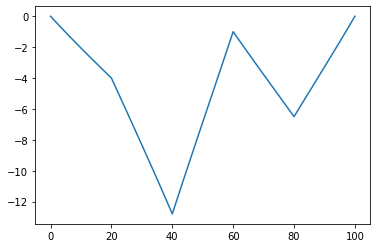

In [67]:
my = np.full((95,),-5)
cov_z_inv = np.linalg.inv(cov_z)
m_cond = my + np.dot(cov_yz, np.dot(cov_z_inv, depth - np.full((6,), -5))) #Attention erreur de signe ? dans la formule c'est marqué - et non + mais on voit ici que c'est + qui marche
l = m_cond.copy()
for i in range(6):
    l = np.insert(l,observation_indexes[i],depth[i])
plt.plot(l)
plt.show()

Q6 :

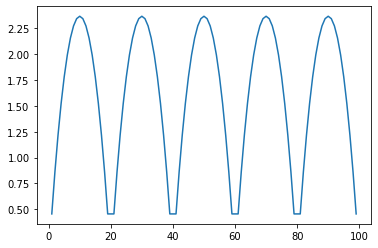

In [69]:
csy = cov_y - np.dot(cov_yz, np.dot(cov_z_inv, np.transpose(cov_yz)))
plt.plot(np.delete(np.arange(101),observation_indexes),np.diag(csy))
plt.show()

Les coefficients diagonaux de la matrice de covariance sont les variances des profondeurs. 
On observe donc que la variance de la profondeur augmente lorsque l'on s'éloigne des points connus, ce qui semble logique.

Q8:

In [7]:
def L(Z,delta):
    S=0
    for i in range(1,len(Z)):
        S+=np.sqrt(delta**2+(Z[i]-Z[i-1])**2)
    return S

Q9: Calcul de la longueur du cable:

Q10: On représente L en fonction de la simulation réalisée.

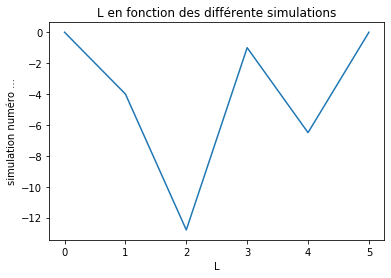

In [34]:
depth_sim=depth


fig, ax = plt.subplots()
ax.set_title("L en fonction des différente simulations")
ax.set_xlabel('L')
ax.set_ylabel('simulation numéro ...')
plt.plot(depth_sim)
plt.show()

On remarque que...

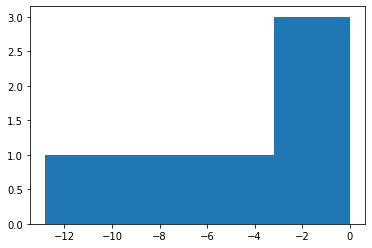

In [39]:
plt.hist(depth_sim,bins='auto')
plt.show()